In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


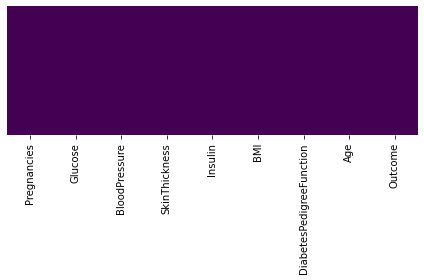

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  #this function gives heatmap of all nan values
   plt.figure(figsize=(6,4))
   sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
   plt.tight_layout()
   return plt.show()
get_heatmap(df)

In [ ]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

# Standardizing the data apart from the Class column
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [ ]:
data_scaled

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
data_scaled.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
data_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
data_scaled['Class'] = df.Outcome

In [ ]:
data_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [ ]:
data_scaled = data_scaled[data_scaled['Class'].notna()]

In [ ]:
#Loading the data
X = data_scaled.iloc[:,0:8]
Y = data_scaled.iloc[:,8:9]

In [ ]:
#Splitting the dataset
#Splitting the dataset into Train & Test Dataset
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
578,1.827813,0.378867,-0.057150,-1.288212,-0.692891,-0.633654,-0.685193,0.234767
427,-0.844885,1.881130,-0.263941,0.593630,0.870031,0.267472,-0.434524,0.404942
402,0.342981,0.472758,0.770014,1.283638,0.071204,0.381700,-0.561368,0.149679
116,0.342981,0.097192,0.253036,-1.288212,-0.692891,0.254780,-0.760696,0.404942
414,-1.141852,0.535352,-0.470732,0.907270,0.757153,0.330932,0.187621,-1.041549
...,...,...,...,...,...,...,...,...
534,-0.844885,-1.373774,-0.677523,0.593630,-0.206648,0.165937,2.353046,-0.786286
584,1.233880,0.097192,0.356432,0.217261,4.516847,-0.417892,0.649699,1.596171
493,0.046014,0.128489,0.046245,-0.159107,0.366423,-0.392508,2.029893,1.000557
527,-0.250952,-0.153185,0.253036,-0.347291,0.218813,-0.722498,-1.101970,-0.786286


In [ ]:
y_train

,Class
578,0
427,1
402,1
116,1
414,1
...,...
534,0
584,1
493,1
527,0


In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test

,Class
158,0
251,0
631,0
757,1
689,1
...,...
312,1
156,0
535,1
423,0


In [ ]:
y_train_pred=clf.predict(x_train)
y_train_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
y_actual=np.array(y_train)
y_actual.flatten()

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
#Evaluating the Model
#Train set results
data = {'y_pred': y_train_pred, 'y_actual': y_actual.flatten()}

data=pd.DataFrame(data)
data

,y_pred,y_actual
0,1,0
1,1,1
2,0,1
3,0,1
4,0,1
...,...,...
571,0,0
572,0,1
573,0,1
574,0,0


In [ ]:
df1=data_scaled

In [ ]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [ ]:
import math
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0
W5_new = 0
W6_new = 0
W7_new = 0
W8_new = 0
#W9_new = 0

# Alpha - learning rate
a = 0.03

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z
for epoch in range(10):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])
    error_x4 = np.array([])
    error_x5 = np.array([])
    error_x6 = np.array([])
    error_x7 = np.array([])
    error_x8 = np.array([])
    #error_x9 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    W5 = W5_new
    W6 = W6_new
    W7 = W7_new
    W8 = W8_new
   # W9 = W9_new
    
    # Iterating through the Df and calculating all parameters:
    for row in df1.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3] + W4*row[4] + W5*row[5] + W6*row[6] + W7*row[7] + W8*row[8] #+ W9*row[9] 
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1.0)
        else:
            p_class = np.append(p_class,0.0)
            
            
    # The error in prediction
    error = p_pred_exps - df1.Class 
    
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*df1['Pregnancies']
    error_x2 = error*df1['Glucose']
    error_x3 = error*df1['BloodPressure']
    error_x4 = error*df1['SkinThickness']
    error_x5 = error*df1['Insulin']
    error_x6 = error*df1['BMI']
    error_x7 = error*df1['DiabetesPedigreeFunction']
    error_x8 = error*df1['Age']
    #error_x9 = error*df1['pred_class']
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    W3_new = W3 - a*np.sum(error_x3)
    W4_new = W4 - a*np.sum(error_x4)
    W5_new = W5 - a*np.sum(error_x5)
    W6_new = W6 - a*np.sum(error_x6)
    W7_new = W7 - a*np.sum(error_x7)
    W8_new = W8 - a*np.sum(error_x8)
   # W9_new = W9 - a*np.sum(error_x9)

    # Adding the predicted class as a separate column to check for performance:
df1['pred_class']=p_class

# Check if any class has been mis classified

In [ ]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,pred_class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,1.0
...,...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0,0.0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0,0.0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0,0.0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1,1.0


In [ ]:
# True Positives
print('TP: ',df1.Class[(df1.Class==1) & (df1.pred_class==1)].count())
# False Positives
print('FP: ',df1.Class[(df1.Class==0) & (df1.pred_class==1)].count())
#True Negatives
print('TN: ',df1.Class[(df1.Class==0) & (df1.pred_class==0)].count())
#False Negatives
print('FN: ',df1.Class[(df1.Class==1) & (df1.pred_class==0)].count())

TP:  67
FP:  105
TN:  395
FN:  201


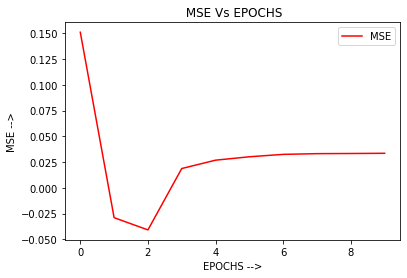

In [ ]:
import matplotlib.pyplot as plt

plt.plot(MSE,label='MSE',color='red')

# Add labels and title
plt.title(" MSE Vs EPOCHS")
plt.xlabel("EPOCHS -->")
plt.ylabel("MSE -->")
 
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression.fit(x_train,y_train)
threshold = 0.5
LogisticRegression.predict(X_test)

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
predictions = LogisticRegression.predict(X_test)

TypeError: ignored

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.765625
Precision: 0.6585365853658537
Recall: 0.46551724137931033


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

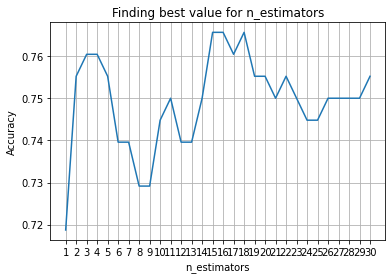

Highest value:  0.765625


In [ ]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(x_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=24)

In [ ]:
Y_pred_knn = knn.predict(X_test)

In [ ]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, Y_pred_knn)

In [ ]:
print("K Nearest neighbors: " + str(accuracy_knn * 100))

K Nearest neighbors: 74.47916666666666


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_knn)
cm

array([[121,  13],
       [ 36,  22]])

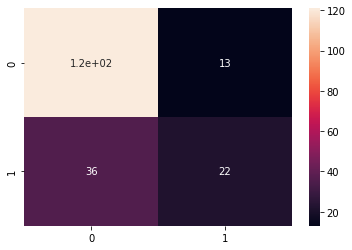

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       134
           1       0.63      0.38      0.47        58

    accuracy                           0.74       192
   macro avg       0.70      0.64      0.65       192
weighted avg       0.73      0.74      0.72       192

